In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1- DATA 

In [182]:
# file name
file_name = 'Data_weather2.csv'

# read data
df = pd.read_csv(file_name , sep = ',')

# convert date to datetime object
df['DATE'] = pd.to_datetime(df['DATE'])
# get data from 2005 to 2014
df = df [ (df ['DATE'] > '2004 - 12 - 31' ) &  (df ['DATE'] < '2016 - 1 - 1') ]
# retrieve only the columns that matters in our study
data = df[['DATE', 'TMAX', 'TMIN']].copy()
data

C:\Users\Salima\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,11,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DATE,TMAX,TMIN
37416,2005-02-01,150.0,33.0
37417,2005-02-02,194.0,56.0
37418,2005-02-03,172.0,28.0
37419,2005-02-04,167.0,28.0
37420,2005-02-05,167.0,44.0
...,...,...,...
41380,2015-12-26,100.0,6.0
41381,2015-12-27,111.0,-28.0
41382,2015-12-28,72.0,-17.0
41383,2015-12-29,89.0,11.0


In [183]:
# convert data from tenth of degrees (C) to degrees (C)
data['TMAX'] = data['TMAX'].multiply(0.1)
data['TMIN'] = data['TMIN'].multiply(0.1)
data

,DATE,TMAX,TMIN
37416,2005-02-01,15.0,3.3
37417,2005-02-02,19.4,5.6
37418,2005-02-03,17.2,2.8
37419,2005-02-04,16.7,2.8
37420,2005-02-05,16.7,4.4
...,...,...,...
41380,2015-12-26,10.0,0.6
41381,2015-12-27,11.1,-2.8
41382,2015-12-28,7.2,-1.7
41383,2015-12-29,8.9,1.1


In [184]:
#add months column dates
data_2015 = data [data['DATE'] >= '2015-01-01']
data = data [ data['DATE'] < '2015 - 01 - 01']
data['Month'] = data['DATE'].dt.month
data['Month_Day'] = data['DATE'].dt.strftime('%m-%d')

data_2015

<ipython-input-184-193a9ebd491d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['DATE'].dt.month
<ipython-input-184-193a9ebd491d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month_Day'] = data['DATE'].dt.strftime('%m-%d')


,DATE,TMAX,TMIN
41028,2015-01-01,12.8,-1.1
41029,2015-01-02,11.1,-2.2
41030,2015-01-03,11.7,-2.2
41031,2015-01-04,12.8,0.6
41032,2015-01-05,13.3,0.0
...,...,...,...
41380,2015-12-26,10.0,0.6
41381,2015-12-27,11.1,-2.8
41382,2015-12-28,7.2,-1.7
41383,2015-12-29,8.9,1.1


In [275]:
max_temp = data.groupby('Month_Day')['TMAX'].max()
max_temp


Month_Day
01-01    18.3
01-02    17.8
01-03    20.0
01-04    18.9
01-05    20.6
         ... 
12-27    18.9
12-28    16.7
12-29    21.1
12-30    18.3
12-31    17.2
Name: TMAX, Length: 366, dtype: float64

In [290]:
min_temp = data.groupby('Month_Day')['TMIN'].min()
min_temp

Month_Day
01-01   -1.1
01-02   -1.1
01-03   -2.2
01-04   -2.8
01-05   -2.2
        ... 
12-27   -1.7
12-28   -1.1
12-29   -1.1
12-30   -1.7
12-31   -1.1
Name: TMIN, Length: 366, dtype: float64

In [291]:
data_2015['Month_Day'] = data_2015['DATE'].dt.strftime('%m-%d')
max_2015 = data_2015.groupby('Month_Day')['TMAX'].max()
min_2015 = data_2015.groupby('Month_Day')['TMIN'].min()
min_2015

<ipython-input-291-d72836f268c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Month_Day'] = data_2015['DATE'].dt.strftime('%m-%d')


Month_Day
01-01   -1.1
01-02   -2.2
01-03   -2.2
01-04    0.6
01-05    0.0
        ... 
12-26    0.6
12-27   -2.8
12-28   -1.7
12-29    1.1
12-31   -1.7
Name: TMIN, Length: 357, dtype: float64

In [292]:
# Create datetime indx
index = min_temp.index
index


Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10',
       ...
       '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29',
       '12-30', '12-31'],
      dtype='object', name='Month_Day', length=366)

In [293]:
index2 = min_2015.index
min_2015 =  min_2015 [[elem for elem in index2 if min_2015[elem] < min_temp[elem]]]
max_2015 = max_2015 [[elem for elem in index2 if max_2015[elem] > max_temp[elem]]]
index_min = min_2015.index
index_max = max_2015.index


In [294]:
min_2015

Month_Day
01-02   -2.2
04-01    3.9
05-08    6.7
09-06    8.3
11-06    3.3
11-07    3.3
11-14    2.8
11-29   -2.2
12-13   -3.9
12-16   -1.1
12-27   -2.8
12-28   -1.7
12-31   -1.7
Name: TMIN, dtype: float64

Text(0.5, 1.0, 'Extreme Temperature in Calfornia (2005-2015)')

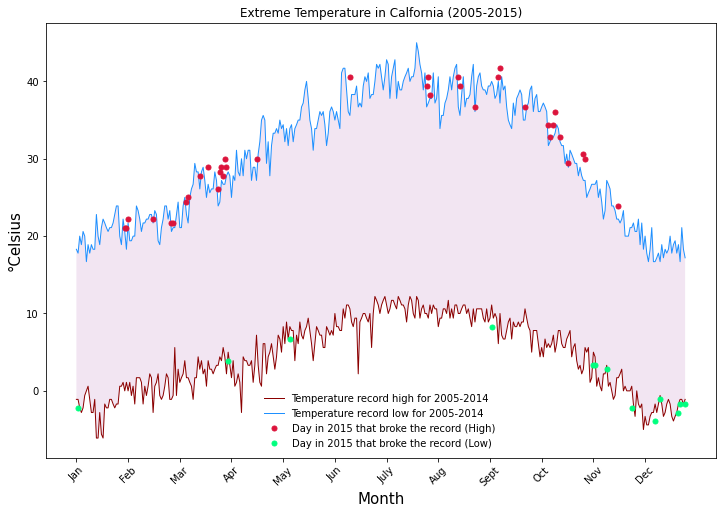

In [309]:

plt.figure(figsize=(12,8))
plt.plot(index, min_temp, color='darkred',linewidth=1)
plt.plot(index, max_temp, color='dodgerblue', linewidth=1)
plt.xlabel('Month', fontsize=15)
plt.ylabel('°Celsius', fontsize=15)
plt.fill_between(range(len(min_temp)), 
                       min_temp, max_temp, 
                       facecolor='purple', 
                       alpha=0.10)
plt.plot(index_max,max_2015, label='2015 new high',marker='o',linewidth=0,markersize=5,color='crimson')
plt.plot(index_min,min_2015, label='2015 new low',marker='o',linewidth=0,markersize=5,color='springgreen')


labels = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']
loc = range (0,365,31)
plt.xticks(loc, labels, rotation= 45)
# Set x and y limits.
# Create legend and title
plt.legend(['Temperature record high for 2005-2014', 'Temperature record low for 2005-2014',
           'Day in 2015 that broke the record (High) ',
           'Day in 2015 that broke the record (Low) '], loc='lower center', frameon=False)
plt.title('Extreme Temperature in Calfornia (2005-2015)')


